In [91]:
##########################################################################

## service classification Dataset 2.0 json format							##

##########################################################################
## Format: parameters 		##
## Format: (1) id						exampl: f73b9c6207fd42e3adc4b51a8f8fc5df    ##
## Format: (2) _type					exampl: REST    ##
## Format: (3) source					exampl: https://www.programmableweb.com/api/openstreetmap-rest-api-v06##
## Format: (4) category					exampl: Mapping ##
## Format: (5) url						exampl: http://api.openstreetmap.org/   ##
## Format: (7) description				exampl: OpenStreetMap is the free wiki world map,##
## Format: (8) quality					exampl: null##
##########################################################################


# Service Classification_ Step2 : Classification

Regarding our data type, we have used  Text data Classification.
Text classification is one of the most important tasks in Natural Language Processing. 


There is two major approaches in NLP for feature extraction from  text data:

* Bag of words (BOW): A bag-of-words is a representation of text that describes the occurrence of words within a document. It involves two things: A vocabulary of known words. A measure of the presence of known words.

* Word Embedding is one of the most popular representations of document vocabulary. It is capable of capturing the context of a word in a document, semantic and syntactic similarity, relation with other words

In a small dataset and as a simple solution, we have used BOW.  However, word embedding can be helpful for large imbalanced data. combination of word-embedding + CNN is investigating.


In this section, we will use clustered dataset(which just include name, category, and desc fields) that we have provided in the clustering notebook (1_Cluster_Services_)


Note: The origin clustered dataset has been used in this notebook. Therefore, this notebook includes NLP processing, which can help to join future data-set easier.


In [92]:
# !pip install -r requirements.txt
# !conda install -c conda-forge wordcloud=1.6.0 -y
# !pip install folium
# !pip install pandas
# !pip install requests 
# !pip install  nltk
# !pip install requests 
# !pip install  unidecode
# !pip install matplotlib
# !pip install matplotlib
# !pip install seaborn

In [93]:
# Data Structures
import numpy  as np
import pandas as pd
import json
import os
import csv

# Corpus Processing
import re
import nltk.corpus
from unidecode                        import unidecode
from nltk.tokenize                    import word_tokenize
from nltk                             import SnowballStemmer
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.preprocessing            import normalize

import nltk
nltk.download('stopwords')
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re
import sys
import warnings

# K-Means
from sklearn import cluster

# Visualization and Analysis
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud


#import branca.colormap as cm
from branca.element import Figure

#classifiers
# from imblearn.pipeline       import Pipeline 
# from sklearn.model_selection import cross_validate
# from imblearn.over_sampling  import RandomOverSampler
# import numpy as np
# from sklearn.metrics import precision_score
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.ensemble import RandomForestClassifier

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bisite/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [94]:
df=pd.read_csv('Clustered_dataset.csv')  

print ('Number of data points : ', df.shape[0], \
       '\n Number of features/variables:', df.shape[1])

print(df.category.nunique())
df.head(3)

Number of data points :  4249 
 Number of features/variables: 2
24


,category,description
0,Science,The service provides a data repository support...
1,Weather,The API Hood Global Tides provides Oceans tida...
2,Project Management,The Harvest Time Entries API returns a list of...


## NLP Preprosessing



In [95]:
df_4_=df

#convert to lower case
df_4_['description']=df_4_['description'].str.lower()

## Remove None / Null value from description
df_4_ = df_4_[pd.notnull(df_4_['description'])]
df_4_ 

,category,description
0,Science,the service provides a data repository support...
1,Weather,the api hood global tides provides oceans tida...
2,Project Management,the harvest time entries api returns a list of...
3,Financial,the 37coins affiliate api allows developers to...
4,Stocks,the intrinio guayaquil stock exchange prices a...
...,...,...
4244,Marketing,peer39 helps partners improve the relevance of...
4245,Jobs,"copify is an online copywriting service, conne..."
4246,Science,the world magnetic model calculates the intens...
4247,Games^Sports,"the harry potter api returns spell routes, cha..."


In [96]:
import nltk
nltk.download('stopwords')

#function to clean the word of any punctuation or special characters
def cleanPunc(sentence): 
    cleaned = re.sub(r'[?|!|\[|\]|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|)|(|\|/]',r' ',cleaned)
    cleaned = re.sub(r'[\d]',r' ',cleaned)#remove digite
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n","")
    return cleaned

df_4_['description'] = df_4_['description'].astype(str).apply(cleanPunc)


#function for remove stop words, for example google should remove?
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten',
                   '1','2','3','4','5','6','7','8','9','10',
                   'may','also','across','among','beside','however','yet','within','many',
                   'first','second','third','fifth','this','the','monthly',"google","yahoo","Google","Yahoo","api"])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)

def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)


df_4_['description'] = df_4_['description'].apply(removeStopWords)

df_4_

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bisite/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,category,description
0,Science,service provides data repository supporting ...
1,Weather,hood global tides provides oceans tidal heig...
2,Project Management,harvest time entries returns list time ent...
3,Financial,coins affiliate allows developers access ...
4,Stocks,intrinio guayaquil stock exchange prices dat...
...,...,...
4244,Marketing,peer helps partners improve relevance onl...
4245,Jobs,"copify online copywriting service, connectin..."
4246,Science,world magnetic model calculates intensity d...
4247,Games^Sports,"harry potter returns spell routes, character..."


## Tokenize

In [97]:
nltk.download('punkt')
nltk.download('wordnet')

import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.tokenize import WhitespaceTokenizer
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer

df_6_=df_4_

from nltk.tokenize import RegexpTokenizer
tokenizer=RegexpTokenizer(r'\w+')

df_6_['description']=df_4_['description'].apply(lambda x:tokenizer.tokenize(x.lower()))
df_6_

[nltk_data] Downloading package punkt to /Users/bisite/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/bisite/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,category,description
0,Science,"[service, provides, data, repository, supporti..."
1,Weather,"[hood, global, tides, provides, oceans, tidal,..."
2,Project Management,"[harvest, time, entries, returns, list, time, ..."
3,Financial,"[coins, affiliate, allows, developers, access,..."
4,Stocks,"[intrinio, guayaquil, stock, exchange, prices,..."
...,...,...
4244,Marketing,"[peer, helps, partners, improve, relevance, on..."
4245,Jobs,"[copify, online, copywriting, service, connect..."
4246,Science,"[world, magnetic, model, calculates, intensity..."
4247,Games^Sports,"[harry, potter, returns, spell, routes, charac..."


## Stemming 

In [98]:
# # Stemming
# from nltk.stem import PorterStemmer
# stmmer=PorterStemmer()

# def word_stemer(text):
#     stem_text=" ".join([stmmer.stem(i) for i in text])
#     return stem_text

# df_7_=df_6_
# df_7_['description']=df_6_['description'].apply(lambda x:word_stemer(x))
# df_7_['description']

## Lemematizing

In [99]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

def word_lemmatizer(text):
    lem_text=" ".join([lemmatizer.lemmatize(i) for i in text])
    return lem_text

df_7_=df_6_
df_7_['description']=df_6_['description'].apply(lambda x:word_lemmatizer(x))
df_7_['description']

0       service provides data repository supporting an...
1       hood global tide provides ocean tidal height e...
2       harvest time entry return list time entry time...
3       coin affiliate allows developer access integra...
4       intrinio guayaquil stock exchange price data f...
                              ...                        
4244    peer help partner improve relevance online dis...
4245    copify online copywriting service connecting c...
4246    world magnetic model calculates intensity dire...
4247    harry potter return spell route character rout...
4248    use satoshipay make digital good like article ...
Name: description, Length: 4249, dtype: object

In [100]:
df_8_ = df_7_[pd.notnull(df_7_['description'])]
df_8_

,category,description
0,Science,service provides data repository supporting an...
1,Weather,hood global tide provides ocean tidal height e...
2,Project Management,harvest time entry return list time entry time...
3,Financial,coin affiliate allows developer access integra...
4,Stocks,intrinio guayaquil stock exchange price data f...
...,...,...
4244,Marketing,peer help partner improve relevance online dis...
4245,Jobs,copify online copywriting service connecting c...
4246,Science,world magnetic model calculates intensity dire...
4247,Games^Sports,harry potter return spell route character rout...


[0. 0. 0. ... 0. 0. 0.]


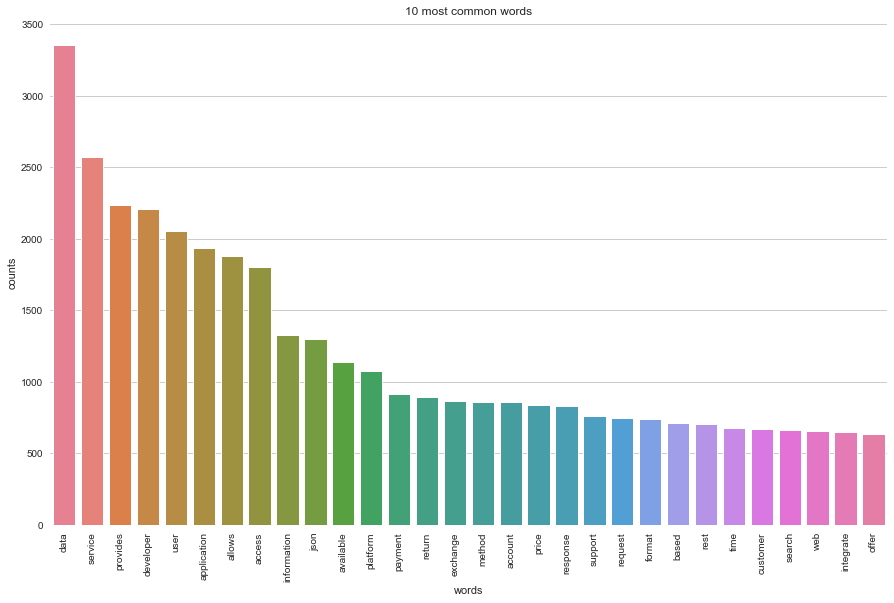

In [101]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as npimport
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    print(total_counts)
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:30]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()# Initialise the count vectorizer with the English stop words
    return words

count_vectorizer = CountVectorizer(stop_words='english')# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df_8_['description'])# Visualise the 10 most common words
words=plot_10_most_common_words(count_data, count_vectorizer)

# words

In [102]:
stop_words = set(stopwords.words('english'))
stop_words.update([
    'marketing', 'format', 'asset',
    "provid", "develop", "servic", "applic", "includ", "inform",
    "avail", "integr", "exchang", "custom", "manag", "retriev", "respons", "creat",
    "messag", 'locat', "enabl", 'authent', 'api', 'market', 'onlin',
    'trade', 'mobil', 'websit', 'data','allow', 'use', 'access', 'user', 'json', 'rest',
    'return', 'payment', 'price', 'platform', 'account', 'support',
    'method', 'request', 'offer', 'get', 'base', 'time', 'list',
    'function', 'search', 'call', 'web', 'make', 'product', 'key',
    'open', 'xml', 'send', 'http', 'new', 'post', 'secur','requir','upload', 'day', 'solut', 'featur',
    'system','compani', 'via', 'content', 'cloud', 'app', 'topic', 'network', 'busi','text','document', 'code',
    
    #                    'code','development','document','way','image','split',
    #                    'number','get','us','featuer','via','low','file','need',
    #                    'help','online','site','include','open','enables','real','http',"including","featuers", 
    #                    'application',  'responses','stock','format','offers','retrieve','calls','requests',
    #                    'functionality','key','includes',  'customers',  'features',  'location',  'content',
    #                    'financi',  'management','mobile', 'text','com','base','tools','public'  'way',  'software', 
    #                    'send',  'company',  'request',  'products',  'specific'   'ful',   'sites',  'day',  'intrinio',
    #                    'list',  'trading',  'manage',  'authentication',   'customer',  'solutions',   
    #                    'support',  'xml',   'new',  'end',  'make',  'tool',  'supports',  'formatted',   'specific', 
    #                    'provider',  'address',  'public',  'app',  'product',  'global',  'close',  'interface', 
    #                    'managing'    ,'feed',  'free', 'historical' ,'details','apps',
    #                    'integration',  'retrieving',  'designed',  'provided',  'service',  'format',  
    #                    'analytics',  'results',  'add',  'status',  'account','data','provide' ,
    #                    'service','developer','user','provides','system','let','build',
    #                    'search','ful','apis' ,'al' ,'ing','es','ed' ,'use','create','using','used','cloud','function',
    #                    'data','service', 'developer','user','provides','allows','application','access','information',
    #                    'method','simple','format','id','build','help','account','result',
    #                    'exchange','providing','server','different','json','available','platform','payment',
    #                    'price','multiple','return','resource','find','detail','support',
    #                    'response','customer','e','c','deal','directly','request',
    #                    'based','project','format','integrate','post','client','point','ability','given','set','u','easy',
    #                    'rest','web','time','current','rate','allow',
    #                    'offer','well','way','use','website','back','name','type','example','high','via ',
    #                    'feature','business','solution', 'update','call','restful',    
    #                    'improve','sent','application','endpoint','required','non','part','making' ,    'either',
    #                    'application','full','allowing','display','creating','variety',

    #                    'cod','imag','split',

    #                   'sit','includ','enabl','real','http',"featu", 
    #                    'application',  'responses','stock','format','offers','retrieve','calls','request',
    #                    'functionality','key','includ',  'customers',  'featur',  'location',  'content',
    #                    'financi',  'management','mobil', 'text','com','bas','tools','public'  'way',  'softwar', 
    #                    'send',  'company',  'request',  'products',  'specific'   'ful',   'sites',  'day',  'intrinio',
    #                    'list',  'trading',  'manag',  'authentication',   'customer',  'solutions',   
    #                    'support',  'xml',   'new',  'end',  'make',  'tool',  'supports',  'formatted',   'specific', 
    #                    'provider',  'address',  'public',  'app',  'product',  'global',  'clos',  'interface', 
    #                    'managing'    ,'feed',  'free', 'historical' ,'details','apps',
    #                    'integration',  'retrieving',  'designed',  'provided',  'servic',  'format',  
    #                    'analytics',  'results',  'add',  'status',  'account','data','provide' ,
    #                    'servic','developer','user','provides','system','let','build',
    #                    'search','ful','apis' ,'al' ,'ing','es','ed' ,'us','creat','using','used','cloud','function',
    #                    'data','service', 'developer','user','provides','allows','application','access','information',
    #                    'method','simple','format','id','build','help','account','result',
    #                    'exchange','providing','server','different','json','available','platform','payment',
    #                    'price','multiple','return','resource','find','detail','support',
    #                    'respons','customer','e','c','deal','directly','request',
    #                    'bas','project','format','integrate','post','client','point','ability','given','set','u','easy',
    #                    'rest','web','tim','current','rat','allow',
    #                    'offer','well','way','use','websit','back','nam','typ','exampl','high','via ',
    #                    'featur','business','solution', 'updat','call','restful',    
    #                    'improv','sent','application','endpoint','required','non','part','making' ,    'either',
    #                    'application','full','allowing','display','creating','variety',

])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)


def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)


df_8_['description'] = df_8_['description'].apply(removeStopWords)
df_8_['description']


0       service provides  repository supporting analys...
1       hood global tide provides ocean tidal height e...
2       harvest  entry    entry  entry returned sorted...
3       coin affiliate allows developer  integrate aff...
4       intrinio guayaquil stock exchange   feed provi...
                              ...                        
4244    peer help partner improve relevance online dis...
4245    copify online copywriting service connecting c...
4246    world magnetic model calculates intensity dire...
4247    harry potter  spell route character route hous...
4248     satoshipay  digital good like article image v...
Name: description, Length: 4249, dtype: object

In [103]:
 e=pd.Series(' '.join(df_8_['description']).lower().split()).value_counts()[:100]
# e.head(50)

In [104]:
    
g1=pd.Series(' '.join(df_8_[ (df_8_['category'] == 'Tools') ]['description']).lower().split()).value_counts()[:50] 
# g1

In [105]:
g2=pd.Series(' '.join(df_8_[ (df_8_['category'] == 'Internet of Things') ]['description']).lower().split()).value_counts()[:50] 
# g2

In [106]:
g1[g1.isin(g2)]

Series([], dtype: int64)

## Count most frequent 50 words from sentences in Dataframe Pandas

[0. 0. 0. ... 0. 0. 0.]


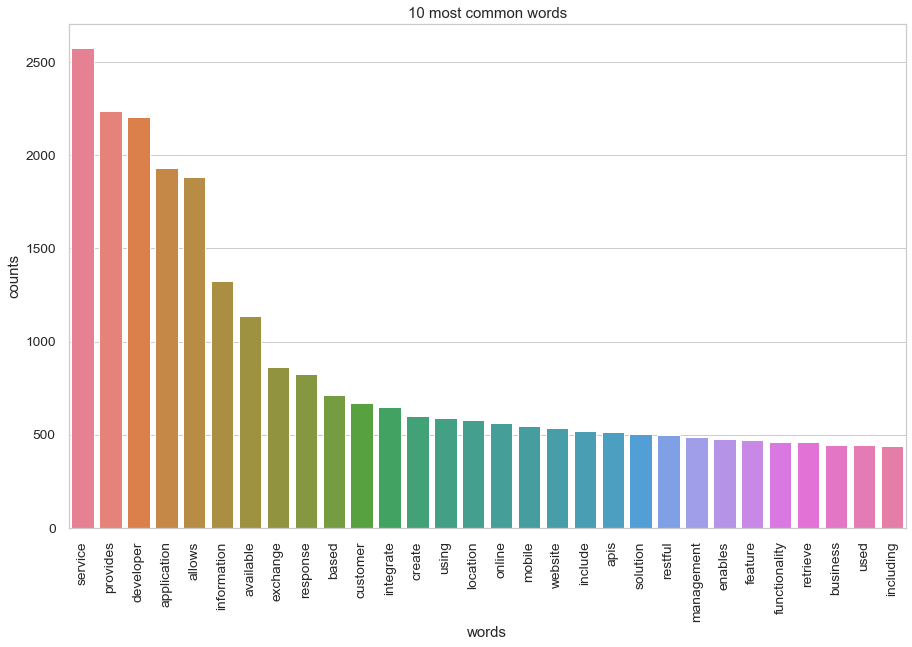

In [107]:
count_vectorizer = CountVectorizer(stop_words='english')# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df_8_['description'])# Visualise the 10 most common words
words=plot_10_most_common_words(count_data, count_vectorizer)


## shaffle df 


In [108]:
df_reduced_cat2=df_8_

In [109]:
df_new = df_reduced_cat2.sample(frac=1).reset_index(drop=True)
df_new = df_reduced_cat2.rename(columns={'description': 'text'})
df_new

,category,text
0,Science,service provides repository supporting analys...
1,Weather,hood global tide provides ocean tidal height e...
2,Project Management,harvest entry entry entry returned sorted...
3,Financial,coin affiliate allows developer integrate aff...
4,Stocks,intrinio guayaquil stock exchange feed provi...
...,...,...
4244,Marketing,peer help partner improve relevance online dis...
4245,Jobs,copify online copywriting service connecting c...
4246,Science,world magnetic model calculates intensity dire...
4247,Games^Sports,harry potter spell route character route hous...


In [110]:
# df_new.to_csv('NLP_preprocessed_service_data_maped.csv', index = False, header=True)

In [111]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
vectorizer =  CountVectorizer()

# split the data into train and test set
train, test = train_test_split(df_new, test_size=0.2, random_state=42, shuffle=True)

print("train : ",np.array(train).shape)

print("test :" ,np.array(test).shape)

train_df = train
test_df = test

test_df.shape

train :  (3399, 2)
test : (850, 2)


(850, 2)

In order for our model to predict the topic of each summary we need to convert the category into a number.  For that we use the Scikit-Learn [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) class.  We append a new column to the dataframe called `target` that will be the numerical value of the class:

In [112]:
from sklearn.preprocessing import LabelEncoder  

labeler = LabelEncoder()
train_df["target"] = labeler.fit_transform(train_df["category"])
test_df["target"]  = labeler.transform(test_df["category"])


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [113]:
# train_df.to_csv('train.csv', index = False, header=True)
# test_df.to_csv('test.csv', index = False, header=True)
train_df

,category,text,target
1402,Financial,erste group netbanking service provides acc...,4
3764,Financial,bitfinex bitcoin trading provides bitcoin wa...,4
3878,Science,nasa techtransfer provides developer structure...,17
3514,Government,central business register cvr contains primary...,6
1623,Routing,ordnance survey name reliable lookup great b...,16
...,...,...,...
3444,Shipping,trimble trip management driver trip allows de...,19
466,Security,sophoslabs intelix based threat intelligence ...,18
3092,Development^Deploy,leancloud application development enables st...,2
3772,Development^Deploy,purecloud screen share allows customer share s...,2


In order to view the human readible version of the target we create a dictionary to map the categorical variables (numbers) to labels:

In [114]:
mapping = dict(zip(labeler.classes_, range(len(labeler.classes_))))
print(mapping)

{'Agriculture': 0, 'Artificial Intelligence': 1, 'Development^Deploy': 2, 'Email': 3, 'Financial': 4, 'Games^Sports': 5, 'Government': 6, 'Healthcare': 7, 'Internet of Things': 8, 'Jobs': 9, 'Marketing': 10, 'Messaging': 11, 'Music': 12, 'Photos': 13, 'Project Management': 14, 'Real Estate': 15, 'Routing': 16, 'Science': 17, 'Security': 18, 'Shipping': 19, 'Social': 20, 'Stocks': 21, 'Travel': 22, 'Weather': 23}


the number of samples in the training and test set:

In [115]:
train_cts = train_df.groupby("target").size()
test_cts  = test_df.groupby("target").size()

Text(0, 0.5, 'Counts')

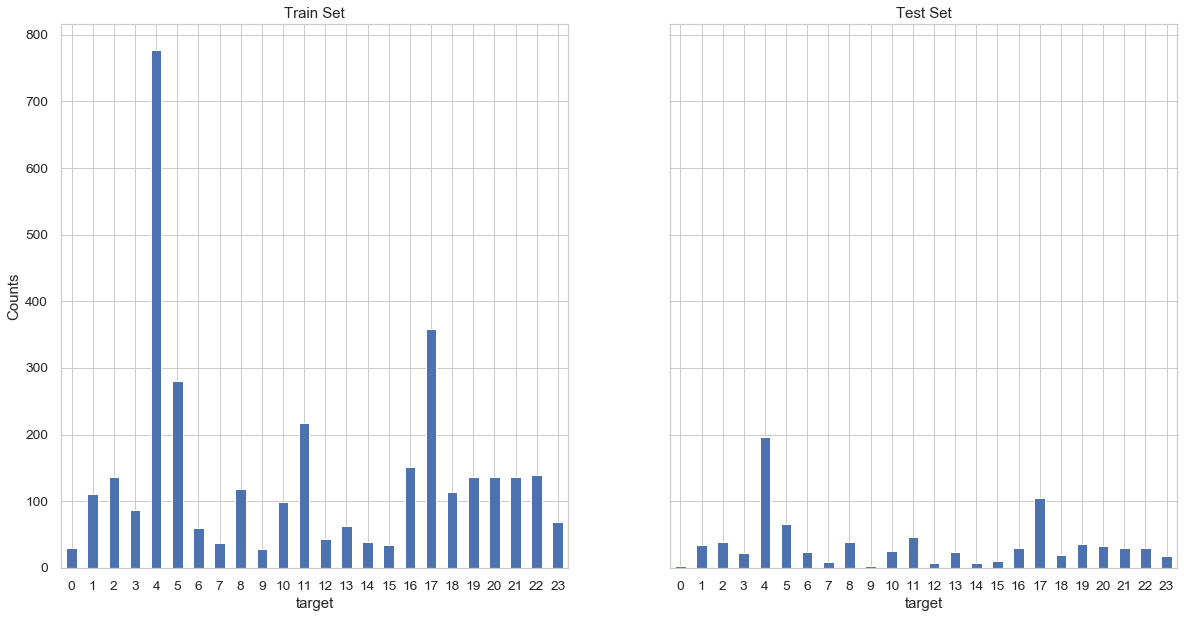

In [116]:
import matplotlib.pyplot as plt
%matplotlib inline

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10), sharey=True)
train_cts.plot(kind='bar',ax= ax1,rot=0)
test_cts.plot(kind='bar',ax= ax2,rot=0)
ax1.set_title('Train Set')
ax2.set_title('Test Set')
ax1.set_ylabel("Counts")

In terms of percentages they are the exact same percentage of target classes: 

Text(0, 0.5, '%')

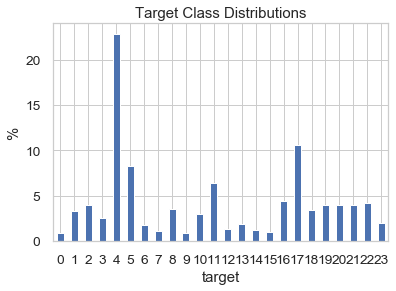

In [117]:
percents = 100 * train_df.groupby("target").size() / train_df.shape[0]

percents.plot(kind='bar', title='Target Class Distributions', rot=0)
plt.ylabel("%")
              

We can see that classes areimbalanced

 most commonly used words in each target class using a [word cloud](https://amueller.github.io/word_cloud/)

In [118]:
from wordcloud import WordCloud, STOPWORDS

def plot_wordcloud(df: pd.DataFrame, category: str, target: int)-> None:
    words = " ".join(train_df[train_df["target"] == target]["text"].values)

    plt.rcParams['figure.figsize'] = 10, 20
    wordcloud = WordCloud(stopwords=STOPWORDS, 
                          background_color="white",
                          max_words=1000).generate(words)

    plt.title("WordCloud For {}".format(category))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    

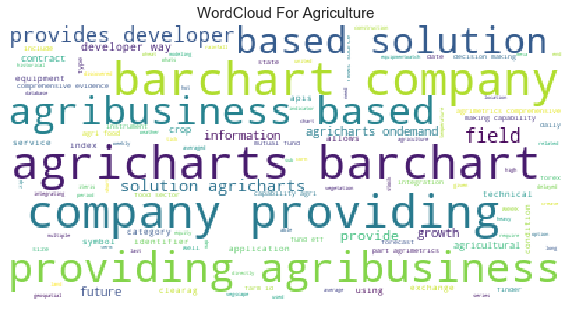

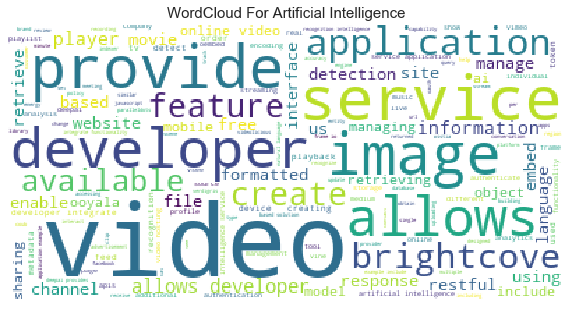

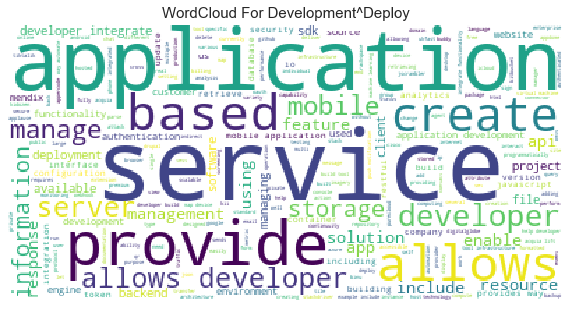

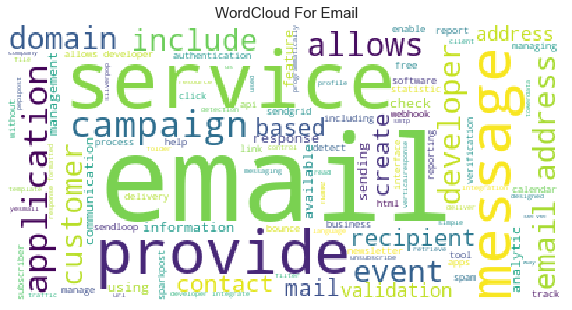

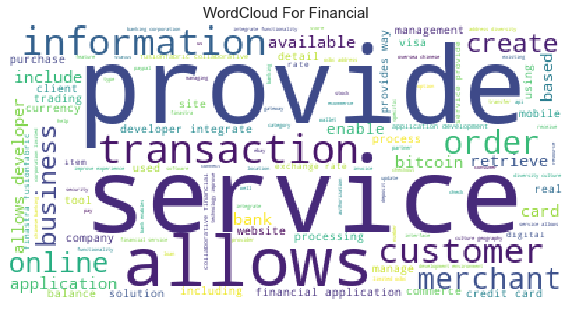

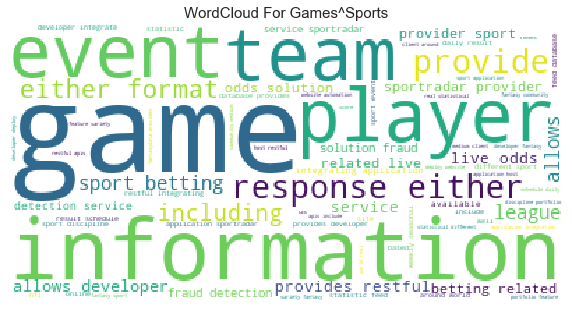

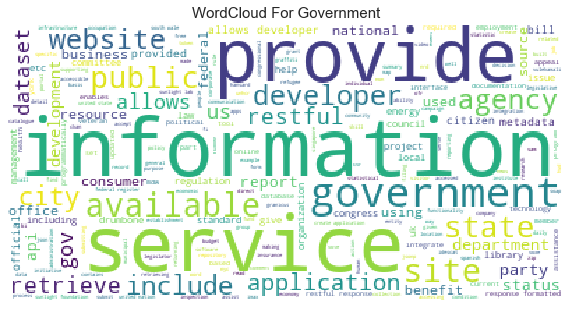

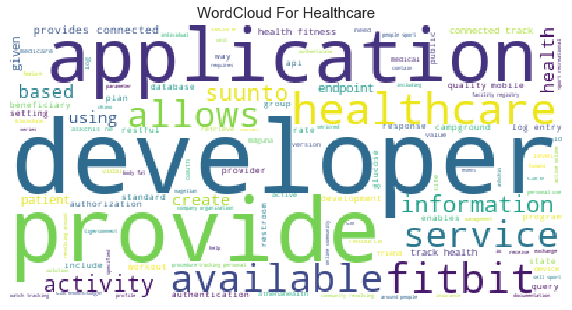

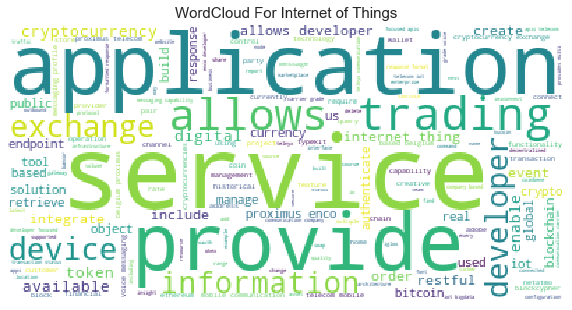

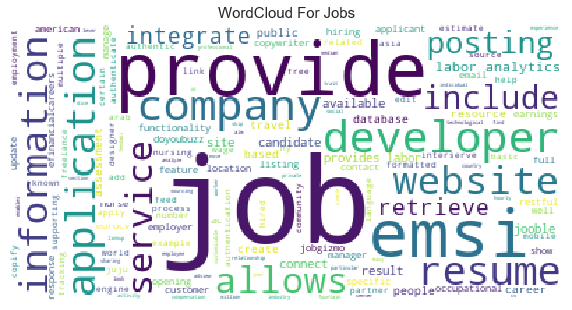

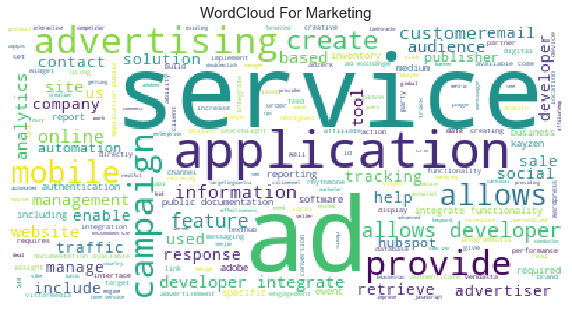

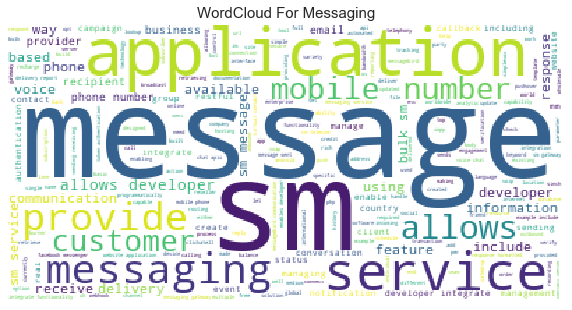

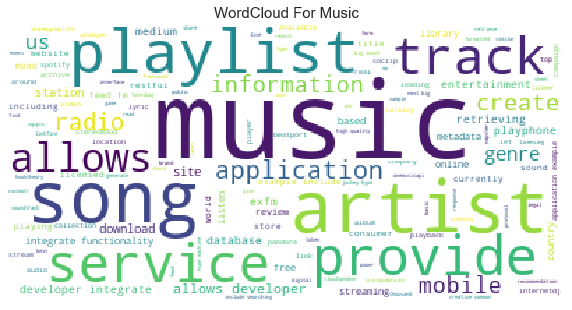

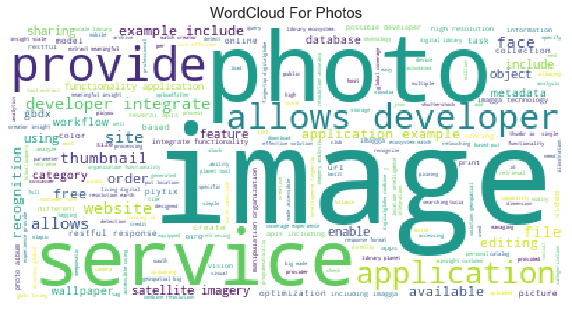

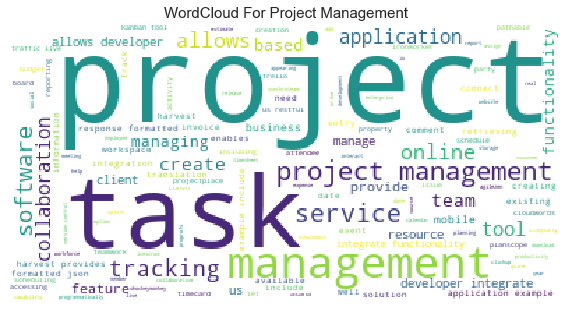

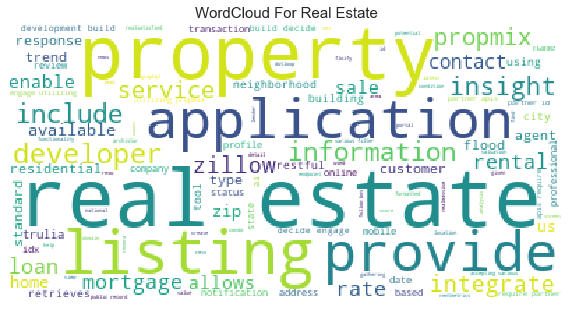

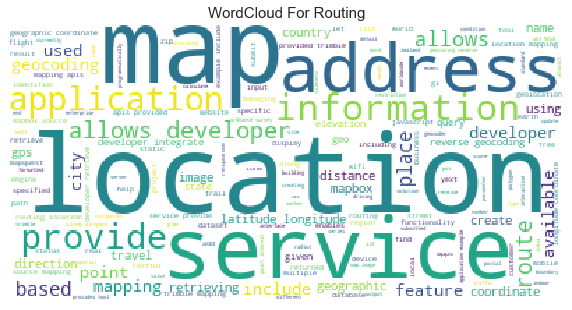

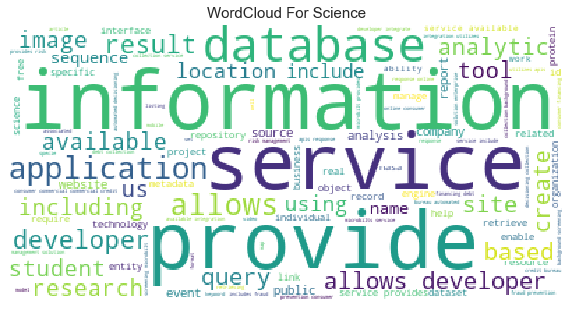

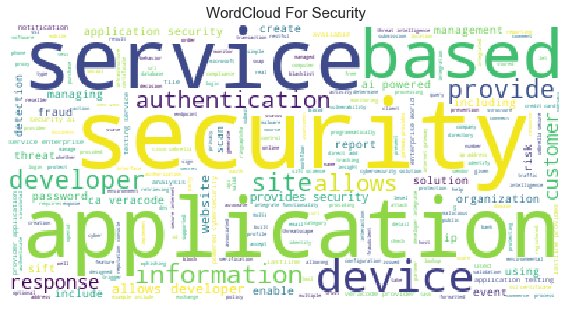

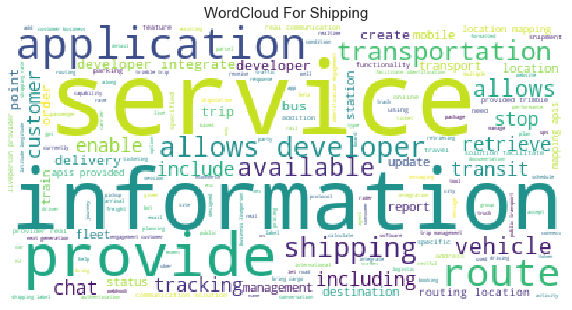

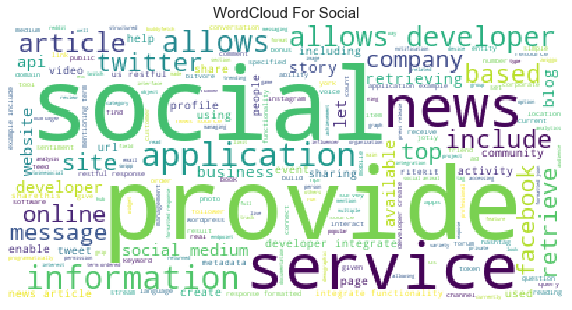

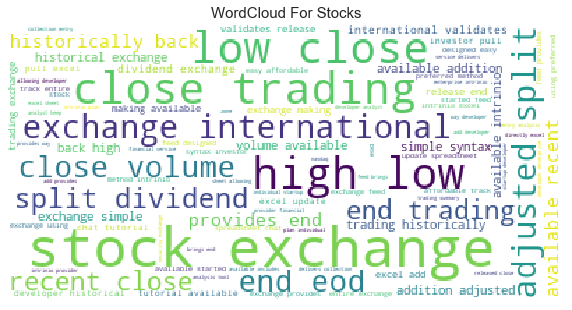

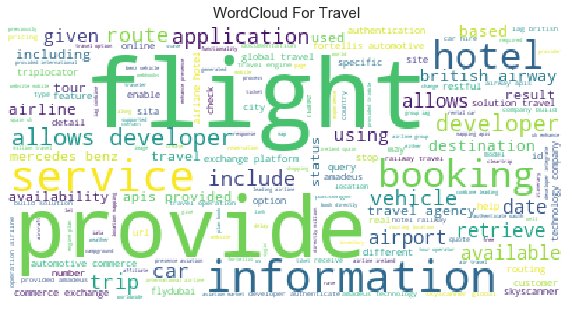

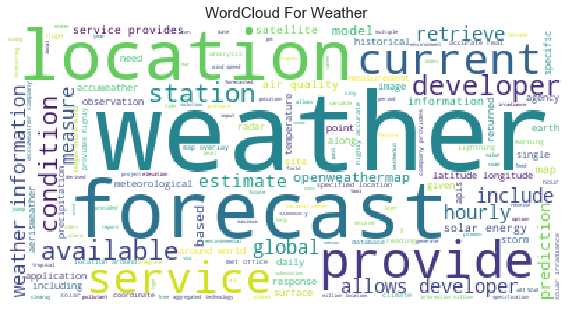

In [119]:
for category, target in mapping.items():
    plot_wordcloud(train_df, category, target)

We can see that some of the most common words to each topic are commonly occuring across topics. If we run into issues with our model performance we may consider including these common words as stop words.


However, in Natural Language Processing there is much more substantial preprocessing stage that we'll go over next.

##  TF-IDF: Preprocessing & Feature Extraction <a class="anchor" id="third-bullet"></a>
--------------------


The order of the words is off and CountVectorizer dropped single letter words and punctutation, but the rest is the same!

**Notice CountVectorizer converts everything to lowercase, drops single letter words and punctuation.**

Let's try CountVectorizer on our dataset:

In [120]:
count_vect = CountVectorizer(max_features = 7000)

X_train_tf = count_vect.fit_transform(train_df["text"])

print("Shape of term-frequency matrix:", X_train_tf.shape)

Shape of term-frequency matrix: (3399, 7000)


The term-frequency is a sparse matrix where each row is a document in our training corpus ($\mathcal{D}$) and each column corresponds to a term/word in the bag-of-words list. This can be confirmed by comparing the number of rows in the term-frequency matrix to the number of documents in the training set:

In [121]:
print("Number of training documents: ", train_df.shape[0])

Number of training documents:  3399


Most often term-frequency alone is not a good measure of the importance of a word/term to a document's topic.  

To circumvent the limination of term-frequency, we often normalize it by the **inverse document frequency (idf)**.  This results in the **term frequency-inverse document frequency (tf-idf)** matrix.  

In [122]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_tf)
X_train_tfidf.shape

(3399, 7000)

In [123]:
# !pip install utils

In [124]:
# from utils.PlotTFIDF import top_feats_by_class, plot_tfidf_classfeats_h

# features = count_vect.get_feature_names()
# tfidfs   = top_feats_by_class(X_train_tfidf, train_df["category"], features)
# plot_tfidf_classfeats_h(tfidfs)

In [125]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC

model =LinearSVC(class_weight='balanced',random_state=777)
model.fit(X_train_tfidf, train_df["target"])


X_test_tf = count_vect.transform(test_df["text"])
X_test_tfidf = tfidf_transformer.transform(X_test_tf)

predicted = model.predict(X_test_tf)
print("Accuracy:", accuracy_score(test_df["target"], predicted))

from sklearn.metrics import classification_report

print(classification_report(test_df["target"],
                            predicted, 
                            target_names=mapping))

Accuracy: 0.7694117647058824
                         precision    recall  f1-score   support

            Agriculture       0.75      1.00      0.86         3
Artificial Intelligence       0.74      0.74      0.74        34
     Development^Deploy       0.45      0.79      0.57        39
                  Email       0.76      0.86      0.81        22
              Financial       0.87      0.86      0.86       196
           Games^Sports       0.91      0.80      0.85        66
             Government       0.81      0.74      0.77        23
             Healthcare       0.89      0.89      0.89         9
     Internet of Things       0.76      0.67      0.71        39
                   Jobs       0.60      1.00      0.75         3
              Marketing       0.73      0.64      0.68        25
              Messaging       0.78      0.85      0.81        46
                  Music       0.83      0.71      0.77         7
                 Photos       0.61      0.83      0.70      

In [126]:
from sklearn.metrics import balanced_accuracy_score

print("balanced_accuracy", balanced_accuracy_score(test_df["target"], 
                                                   predicted))

balanced_accuracy 0.7971260854465223


In [127]:
from sklearn.metrics import f1_score

print("weighted f1 score:", f1_score(test_df["target"], 
                                     predicted, 
                                     average="weighted"))

weighted f1 score: 0.7706404143067536


In [128]:
#perform numerical target toprovide CF matrix
from sklearn.preprocessing import label_binarize
import numpy as np

# get the number of classes
n_classes = len(train_df["target"].unique())

# classes = [0,1,2,3]
classes   = np.sort(train_df["target"].unique())

# relabel the test set
y_test = label_binarize(test_df["target"], 
                        classes=classes)
y_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [129]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

ros = RandomOverSampler('minority',random_state=656)
X_ROS, y_ROS = ros.fit_sample(X_train_tfidf, train_df["target"])
# X_train, x_test, Y_train, y_test = train_test_split(X_ROS,y_ROS,test_size=0.4,random_state=42)
sgd = SGDClassifier(max_iter=10000, tol=1e-3)
sgd.fit(X_ROS,y_ROS)
pred_sgd = sgd.predict(X_test_tfidf)
print('Accuracy %s' % accuracy_score(pred_sgd,test_df["target"]))
print(classification_report(test_df["target"],pred_sgd))

Accuracy 0.7952941176470588
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       0.85      0.68      0.75        34
           2       0.64      0.69      0.67        39
           3       0.83      0.86      0.84        22
           4       0.79      0.94      0.86       196
           5       0.95      0.82      0.88        66
           6       0.93      0.57      0.70        23
           7       1.00      1.00      1.00         9
           8       0.90      0.69      0.78        39
           9       0.60      1.00      0.75         3
          10       0.83      0.60      0.70        25
          11       0.79      0.89      0.84        46
          12       0.67      0.57      0.62         7
          13       0.77      0.74      0.76        23
          14       1.00      0.86      0.92         7
          15       0.91      1.00      0.95        10
          16       0.70      0.87      0.78        30

Text(0.5, 1, 'SVD Result Confusion Matrix')

<Figure size 576x396 with 0 Axes>

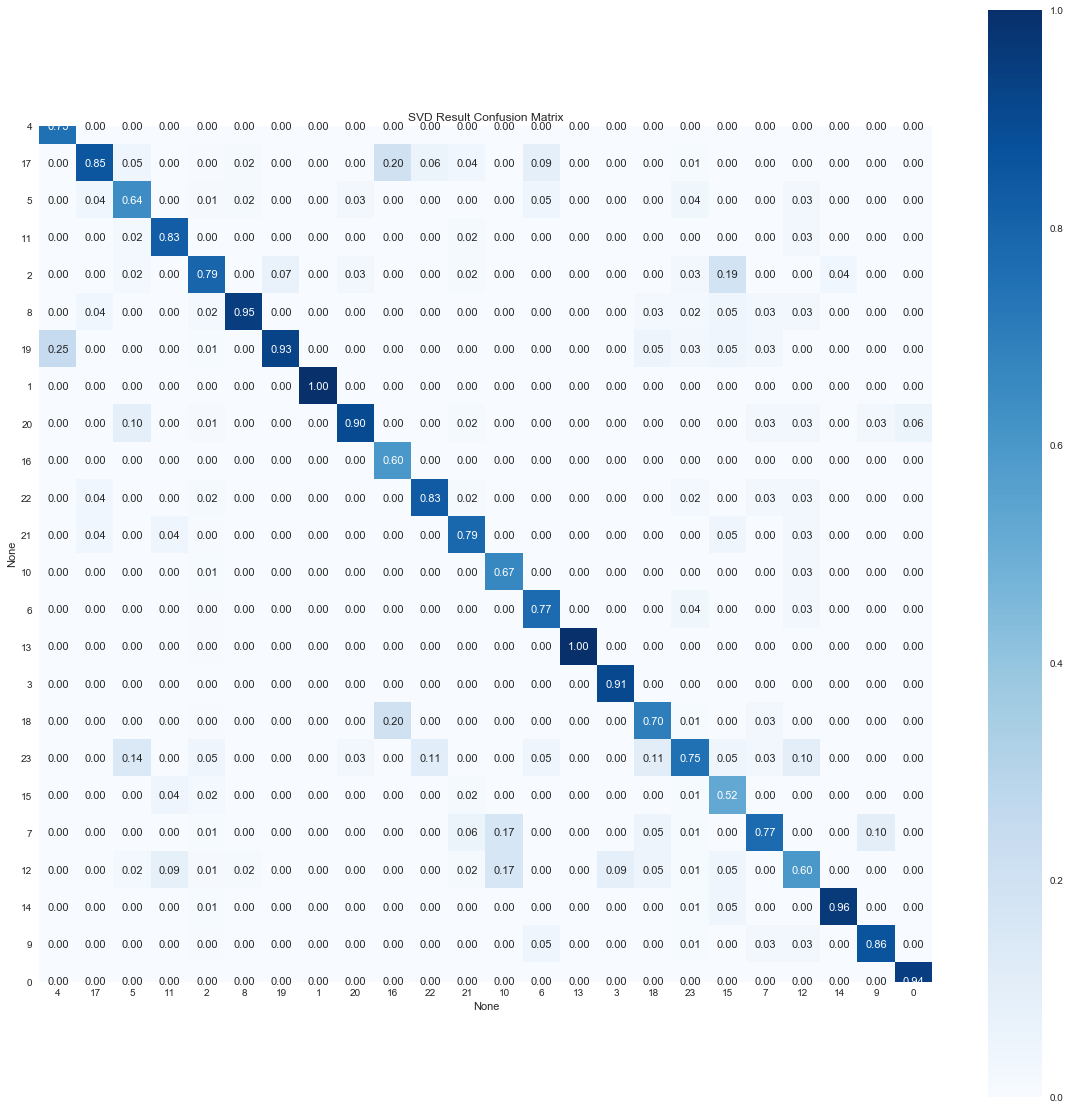

In [130]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#https://stackoverflow.com/questions/54589669/confusion-matrix-error-classification-metrics-cant-handle-a-mix-of-multilabel
import numpy as np
rounded_labels=np.argmax(y_test, axis=1)
rounded_labels[1]


cm_DecisionTree = confusion_matrix(rounded_labels, pred_sgd) 
cm_DecisionTree


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

import seaborn as sns
import math

from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib as mpl

mpl.style.use('seaborn')

conf_arr = np.array(cm_DecisionTree)

sum = conf_arr.sum()

# conf_arr = conf_arr * 100.0 / ( 1.0 * sum )
labelss=list(test_df["target"].value_counts().index)

df_cm = pd.DataFrame(conf_arr, 
  index = [ labelss],
  columns = [labelss])

fig = plt.figure()
fig =plt.figure(figsize = (20,20))

plt.clf()

ax = fig.add_subplot(111)
ax.set_aspect(1)

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 1 # Add 0.5 to the bottom
t -= 1 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
# plt.show() # ta-da!

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

res = sn.heatmap(df_cm/np.sum(df_cm), annot=True, cmap='Blues',vmin=0.0, vmax=1, fmt='.02f', cbar = True,annot_kws={"fontsize":11})
res.set_yticklabels(res.get_yticklabels(), rotation = 0, fontsize = 10)
res.set_yticklabels(res.get_yticklabels(), rotation = 0, fontsize = 10)
# res.invert_yaxis()


# plt.yticks(, [ 'Dog', 'Cat', 'Rabbit'],va='center')

plt.title('SVD Result Confusion Matrix')
# plt.savefig("output_h_dttttt.png")
# plt.savefig('confusion_matrix.png', dpi=100, bbox_inches='tight' )

# plt.close()
# print('222')

In [131]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

smote = SMOTE(random_state=777,k_neighbors=5)
X_smote,y_smote = smote.fit_sample(X_train_tfidf, train_df["target"])
# X_train, x_test, Y_train, y_test = train_test_split(X_ROS,y_ROS,test_size=0.4,random_state=42)
sgd = SGDClassifier(max_iter=10000, tol=1e-3)
sgd.fit(X_smote, y_smote)
pred_sgd = sgd.predict(X_test_tfidf)
print('Accuracy %s' % accuracy_score(pred_sgd,test_df["target"]))
print(classification_report(test_df["target"],pred_sgd))

Accuracy 0.7941176470588235
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       0.83      0.71      0.76        34
           2       0.58      0.72      0.64        39
           3       0.75      0.82      0.78        22
           4       0.85      0.88      0.86       196
           5       0.88      0.79      0.83        66
           6       0.81      0.74      0.77        23
           7       1.00      1.00      1.00         9
           8       0.75      0.69      0.72        39
           9       0.50      1.00      0.67         3
          10       0.73      0.64      0.68        25
          11       0.83      0.85      0.84        46
          12       0.83      0.71      0.77         7
          13       0.82      0.78      0.80        23
          14       0.86      0.86      0.86         7
          15       1.00      1.00      1.00        10
          16       0.74      0.87      0.80        30

In [132]:
from imblearn.pipeline       import Pipeline 
from sklearn.model_selection import cross_validate
from imblearn.over_sampling  import RandomOverSampler
import numpy as np
from sklearn.metrics import precision_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

smote = SMOTE(random_state=777,k_neighbors=5)
X_smote,y_smote = smote.fit_sample(X_train_tfidf, train_df["target"])
# X_train, x_test, Y_train, y_test = train_test_split(X_ROS,y_ROS,test_size=0.4,random_state=42)
sgd = RandomForestClassifier(n_estimators=400, max_depth=400)
sgd.fit(X_train_tfidf, train_df["target"])
pred_sgd = sgd.predict(X_test_tfidf)
print('Accuracy %s' % accuracy_score(pred_sgd,test_df["target"]))
print(classification_report(test_df["target"],pred_sgd))




# nb_pipe_rf  = Pipeline([('vect',    CountVectorizer()),
#                      ('tfidf',   TfidfTransformer()),
#                      ('sampler', RandomOverSampler('all',random_state=42)),
#                      ('model',   RandomForestClassifier(n_estimators=400, max_depth=400))])

Accuracy 0.7235294117647059
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       0.83      0.71      0.76        34
           2       0.58      0.36      0.44        39
           3       0.67      0.73      0.70        22
           4       0.65      0.94      0.77       196
           5       0.88      0.80      0.84        66
           6       1.00      0.35      0.52        23
           7       1.00      0.67      0.80         9
           8       0.85      0.44      0.58        39
           9       0.40      0.67      0.50         3
          10       1.00      0.52      0.68        25
          11       0.63      0.85      0.72        46
          12       0.83      0.71      0.77         7
          13       0.74      0.61      0.67        23
          14       1.00      0.43      0.60         7
          15       1.00      0.90      0.95        10
          16       0.61      0.83      0.70        30

In order to do so we need to convert the labels for our model using the [label_binarize](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.label_binarize.html) function:

In [133]:
from sklearn.preprocessing import label_binarize
import numpy as np

# get the number of classes
n_classes = len(train_df["target"].unique())

# classes = [0,1,2,3]
classes   = np.sort(train_df["target"].unique())

# relabel the test set
y_test = label_binarize(test_df["target"], 
                        classes=classes)
y_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### Scikit-learn Pipelines
---------------

In Scitkit-learn pipelines are a sequence of transformations followed by a final estimator. Intermediate steps within the pipeline must be ‘transform’ methods, that is, they must implement fit and transform methods. The <code>CountVectorizer</code> and <code>TfidfTransformer</code> are used as transformers in our above example.  The final estimator of a pipeline only needs to implement the fit method.  We can see the simplicity of pipelines by using it to re-implement our above analysis using the Naive Bayes model:

In [134]:
from sklearn.pipeline import Pipeline

nb_pipe1 = Pipeline([('vect', CountVectorizer()),
                  ('tfidf', TfidfTransformer()),
                  ('model', MultinomialNB())])

model = nb_pipe1.fit(train_df["text"], train_df["target"])

pred  = model.predict(test_df["text"])

print(classification_report(test_df["target"],
                            pred, 
                            target_names=mapping))

                         precision    recall  f1-score   support

            Agriculture       0.00      0.00      0.00         3
Artificial Intelligence       0.00      0.00      0.00        34
     Development^Deploy       0.00      0.00      0.00        39
                  Email       0.00      0.00      0.00        22
              Financial       0.28      0.99      0.44       196
           Games^Sports       0.95      0.58      0.72        66
             Government       0.00      0.00      0.00        23
             Healthcare       0.00      0.00      0.00         9
     Internet of Things       0.00      0.00      0.00        39
                   Jobs       0.00      0.00      0.00         3
              Marketing       0.00      0.00      0.00        25
              Messaging       0.95      0.41      0.58        46
                  Music       0.00      0.00      0.00         7
                 Photos       0.00      0.00      0.00        23
     Project Management 

/Users/bisite/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Notice how when using pipelines we passed `train_df` and `test_df` into the `fit` and predict methods instead of the `X_train_tfidf` and `X_test_tfidf` objects as we did in the previous section. The transformations occur under-the-hood using the Scikit-learn pipeline functionality.  

## Imbalanced Learn: Fixing Imbalanced Data <a class="anchor" id="fifth-bullet"></a>
-----------------

Class imbalance of our data causes our model to underperform and there is not one clear answer on how to address the issue.  There are two ways to address this issue:

1. Alter the data
2. Alter the algorithm

At the data level we'll try "upsampling the minority class" and "downsampling the majority class", however, we have more than one majority class, that we will refer to all of them as the "majority classes."  At the algorithm level we'll use a support vector machine with class weights and alter the scoring metric in the optimization of the model when tunning hyperparameters. Some other techniques are dicussed [here](https://www.svds.com/learning-imbalanced-classes/).  In oversampling the minority class we [bootstrap](https://en.wikipedia.org/wiki/Bootstrapping_(statistics)) the minority class, repeating samples to make the class sizes similar. In downsampling the majority class we bootstrap the majority class, but reduce the number of samples until all the classes have similar size. This process is depicted below:



There are pitfalls to both these strategies; **upsampling the minority class can bias our model to overemphasize certain words, while downsampling the majority class can also add bias to our model as well.**  Oversampling has traditionally been used in dealing with imbalanced classes so we will start out with that first using the [Imbalanced Learn](https://imbalanced-learn.org/stable/) library which has its own Pipelines class that naturally integrates with Scikit-learn.  

Let's first perform Undersampling of the minority class and take the cross validated average of the balanced accuracy. **Note we now have to use imbalance learn's Pipeline.**

In [135]:
# !pip install imblearn

In [136]:
from imblearn.pipeline       import Pipeline 
from sklearn.model_selection import cross_validate
from imblearn.over_sampling  import RandomOverSampler
import numpy as np
from sklearn.metrics import precision_score

nb_pipe2  = Pipeline([('vect',    CountVectorizer()),
                     ('tfidf',   TfidfTransformer()),
                     ('sampler', RandomOverSampler('all',random_state=42)),
                     ('model',   MultinomialNB())])

Lets get a classification report on the test set. Since we will be doing the same process of evaluating the model pipeline on the same test set let's make a function to do this:

In [137]:
def evaluate_model(
    train_df : pd.DataFrame,
    test_df  : pd.DataFrame,
    mapping  : dict,
    pipe     : Pipeline,
) -> None:

    model = pipe.fit(train_df["text"], 
                     train_df["target"])


    pred  = model.predict(test_df["text"])

    print(classification_report(test_df["target"],
                                pred, 
                                target_names=mapping))
    
    print()
    print("balanced_accuracy", balanced_accuracy_score(test_df["target"], 
                                                       pred))

And then use [partial](https://docs.python.org/2/library/functools.html) so that we only have to feed in the different pipeline each time we want to call it:

In [138]:
from functools import partial

evaluate_pipeline = partial(evaluate_model,
                            train_df,
                            test_df,
                            mapping)

Now we can evaluate the oversampling model pipeline,

In [139]:
evaluate_pipeline(nb_pipe2)

                         precision    recall  f1-score   support

            Agriculture       0.50      1.00      0.67         3
Artificial Intelligence       0.63      0.65      0.64        34
     Development^Deploy       0.56      0.64      0.60        39
                  Email       0.63      0.77      0.69        22
              Financial       0.90      0.76      0.83       196
           Games^Sports       0.93      0.77      0.84        66
             Government       0.75      0.78      0.77        23
             Healthcare       0.89      0.89      0.89         9
     Internet of Things       0.68      0.67      0.68        39
                   Jobs       0.50      1.00      0.67         3
              Marketing       0.49      0.80      0.61        25
              Messaging       0.70      0.83      0.76        46
                  Music       0.86      0.86      0.86         7
                 Photos       0.77      0.74      0.76        23
     Project Management 

We see an increase in artificial intelligence's precision and recall!  We can take a look at the ROC and precision/Recall curve too!

In [140]:
y_pred = nb_pipe2.predict_proba(test_df["text"])


# # from utils.Plot_ROC_PR_Curve import plot_roc_pr
# from scikitplot.metrics import plot_roc_curve
# from sklearn.metrics import roc_curve, auc
# from sklearn import datasets
# from sklearn.multiclass import OneVsRestClassifier
# from sklearn.svm import LinearSVC
# from sklearn.preprocessing import label_binarize
# # from sklearn.cross_validation import train_test_split
# import matplotlib.pyplot as plt
# # plot_roc_curve(model,y_pred ,y_test)



# # Compute ROC curve and ROC area for each class
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# for i in range(24):
#     fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

# # Plot of a ROC curve for a specific class
# for i in range(24):
#     plt.figure()
#     plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
#     plt.plot([0, 1], [0, 1], 'k--')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('Receiver operating characteristic example')
#     plt.legend(loc="lower right")
#     plt.show()

In [143]:
def plot_multiclass_roc(clf, y_pred, y_test, n_classes, figsize=(17, 6)):
    y_score = y_pred

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
#     y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.5)
    sns.despine()
    plt.show()

plot_multiclass_roc(evaluate_pipeline, y_pred, y_test, n_classes=24, figsize=(24, 20))

NameError: name 'roc_curve' is not defined

## Random forest

In [144]:


nb_pipe_rf2  = Pipeline([('vect',    CountVectorizer()),
                     ('tfidf',   TfidfTransformer()),
#                      ('sampler', RandomOverSampler('all',random_state=42)),
                     ('model',   RandomForestClassifier(n_estimators=400, max_depth=400))])


def evaluate_model(
    train_df : pd.DataFrame,
    test_df  : pd.DataFrame,
    mapping  : dict,
    pipe     : Pipeline,
) -> None:

    model = pipe.fit(train_df["text"], 
                     train_df["target"])


    pred_RF  = model.predict(test_df["text"])

    print(classification_report(test_df["target"],
                                pred_RF, 
                                target_names=mapping))
    
    print()
    print("balanced_accuracy", balanced_accuracy_score(test_df["target"], 
                                                       pred_RF))
    
from functools import partial

evaluate_pipeline = partial(evaluate_model,
                            train_df,
                            test_df,
                            mapping)    
evaluate_pipeline(nb_pipe_rf2)    

                         precision    recall  f1-score   support

            Agriculture       0.75      1.00      0.86         3
Artificial Intelligence       0.88      0.68      0.77        34
     Development^Deploy       0.64      0.36      0.46        39
                  Email       0.70      0.73      0.71        22
              Financial       0.65      0.94      0.77       196
           Games^Sports       0.91      0.80      0.85        66
             Government       1.00      0.39      0.56        23
             Healthcare       1.00      0.78      0.88         9
     Internet of Things       0.84      0.41      0.55        39
                   Jobs       0.60      1.00      0.75         3
              Marketing       0.88      0.56      0.68        25
              Messaging       0.65      0.85      0.74        46
                  Music       0.86      0.86      0.86         7
                 Photos       0.71      0.65      0.68        23
     Project Management 

## GradientBoostingClassifier

In [145]:
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier,RandomForestClassifier



from imblearn.pipeline       import Pipeline 
from sklearn.model_selection import cross_validate
from imblearn.over_sampling  import RandomOverSampler
import numpy as np
from sklearn.metrics import precision_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

nb_pipe_gb = Pipeline([('vect',    CountVectorizer()),
                     ('tfidf',   TfidfTransformer()),
                     ('sampler', RandomOverSampler('all',random_state=42)),
                     ('model',  GradientBoostingClassifier(random_state = 1337,
                            max_depth = 10,
                            max_features = None,
                            min_samples_leaf = 8,
                            min_samples_split = 14,
                            n_estimators = 20))])


def evaluate_model(
    train_df : pd.DataFrame,
    test_df  : pd.DataFrame,
    mapping  : dict,
    pipe     : Pipeline,
) -> None:

    model = pipe.fit(train_df["text"], 
                     train_df["target"])


    pred_RF  = model.predict(test_df["text"])

    print(classification_report(test_df["target"],
                                pred_RF, 
                                target_names=mapping))
    
    print()
    print("balanced_accuracy", balanced_accuracy_score(test_df["target"], 
                                                       pred_RF))
    
from functools import partial

evaluate_pipeline = partial(evaluate_model,
                            train_df,
                            test_df,
                            mapping)    
evaluate_pipeline(nb_pipe_gb)   

                         precision    recall  f1-score   support

            Agriculture       0.75      1.00      0.86         3
Artificial Intelligence       0.67      0.59      0.62        34
     Development^Deploy       0.58      0.54      0.56        39
                  Email       0.80      0.55      0.65        22
              Financial       0.86      0.78      0.82       196
           Games^Sports       0.88      0.77      0.82        66
             Government       0.67      0.43      0.53        23
             Healthcare       0.90      1.00      0.95         9
     Internet of Things       0.70      0.59      0.64        39
                   Jobs       0.38      1.00      0.55         3
              Marketing       0.74      0.68      0.71        25
              Messaging       0.72      0.85      0.78        46
                  Music       0.88      1.00      0.93         7
                 Photos       0.85      0.74      0.79        23
     Project Management 

## NN

In [146]:
# !conda install -c conda-forge scikit-plot -y
# !python --version

In [147]:
from imblearn.under_sampling import RandomUnderSampler

nb_pipe3 = Pipeline([('vect',    CountVectorizer()),
                     ('tfidf',   TfidfTransformer()),
                     ('sampler', RandomUnderSampler('all',random_state=100)),
                     ('model',   MultinomialNB())])

evaluate_pipeline(nb_pipe3)

                         precision    recall  f1-score   support

            Agriculture       0.21      1.00      0.35         3
Artificial Intelligence       0.62      0.71      0.66        34
     Development^Deploy       0.32      0.51      0.39        39
                  Email       0.44      0.73      0.55        22
              Financial       0.92      0.47      0.62       196
           Games^Sports       0.84      0.58      0.68        66
             Government       0.67      0.70      0.68        23
             Healthcare       0.75      1.00      0.86         9
     Internet of Things       0.61      0.36      0.45        39
                   Jobs       0.33      1.00      0.50         3
              Marketing       0.46      0.72      0.56        25
              Messaging       0.58      0.85      0.69        46
                  Music       0.60      0.86      0.71         7
                 Photos       0.55      0.91      0.69        23
     Project Management 

In [148]:
from sklearn.svm import LinearSVC

svm_pipe1 = Pipeline([('vect',    CountVectorizer()),
                      ('tfidf',   TfidfTransformer()),
                      ('model',   LinearSVC(random_state=777))])

evaluate_pipeline(svm_pipe1)

                         precision    recall  f1-score   support

            Agriculture       0.75      1.00      0.86         3
Artificial Intelligence       0.85      0.68      0.75        34
     Development^Deploy       0.64      0.69      0.67        39
                  Email       0.79      0.86      0.83        22
              Financial       0.81      0.95      0.88       196
           Games^Sports       0.90      0.83      0.87        66
             Government       0.94      0.70      0.80        23
             Healthcare       1.00      1.00      1.00         9
     Internet of Things       0.90      0.69      0.78        39
                   Jobs       0.60      1.00      0.75         3
              Marketing       0.84      0.64      0.73        25
              Messaging       0.80      0.89      0.85        46
                  Music       0.83      0.71      0.77         7
                 Photos       0.79      0.65      0.71        23
     Project Management 

Straight out of the box, SVM preforms MUCH better than Naive Bayes does. Let's see if oversampling the minority class helps with performance:

In [149]:
svm_pipe2 = Pipeline([('vect',    CountVectorizer()),
                     ('tfidf',   TfidfTransformer()),
                     ('sampler', RandomOverSampler('minority',random_state=400)),
                     ('model',   LinearSVC(random_state=500))])

evaluate_pipeline(svm_pipe2)

                         precision    recall  f1-score   support

            Agriculture       0.75      1.00      0.86         3
Artificial Intelligence       0.85      0.68      0.75        34
     Development^Deploy       0.64      0.69      0.67        39
                  Email       0.79      0.86      0.83        22
              Financial       0.81      0.95      0.87       196
           Games^Sports       0.90      0.83      0.87        66
             Government       1.00      0.70      0.82        23
             Healthcare       1.00      1.00      1.00         9
     Internet of Things       0.90      0.69      0.78        39
                   Jobs       0.60      1.00      0.75         3
              Marketing       0.84      0.64      0.73        25
              Messaging       0.80      0.89      0.85        46
                  Music       0.83      0.71      0.77         7
                 Photos       0.79      0.65      0.71        23
     Project Management 

 class sklearn.svm.LinearSVC(penalty='l2', loss='squared_hinge', *, dual=True, tol=0.0001, C=1.0, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)[source]

    Linear Support Vector Classification.

    Similar to SVC with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.

    This class supports both dense and sparse input and the multiclass support is handled according to a one-vs-the-rest scheme.
    
    
class_weightdict or ‘balanced’, default=None

    Set the parameter C of class i to class_weight[i]*C for SVC. If not given, all classes are supposed to have weight one. The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).


In [150]:
svm_pipe3 = Pipeline([('vect',    CountVectorizer()),
                     ('tfidf',   TfidfTransformer()),
                     ('model',   LinearSVC(class_weight='balanced',
                                           random_state=50))])

evaluate_pipeline(svm_pipe3)

                         precision    recall  f1-score   support

            Agriculture       0.75      1.00      0.86         3
Artificial Intelligence       0.83      0.74      0.78        34
     Development^Deploy       0.59      0.67      0.63        39
                  Email       0.73      0.86      0.79        22
              Financial       0.85      0.87      0.86       196
           Games^Sports       0.95      0.82      0.88        66
             Government       0.77      0.74      0.76        23
             Healthcare       1.00      1.00      1.00         9
     Internet of Things       0.77      0.69      0.73        39
                   Jobs       0.50      1.00      0.67         3
              Marketing       0.77      0.68      0.72        25
              Messaging       0.80      0.89      0.85        46
                  Music       0.75      0.86      0.80         7
                 Photos       0.75      0.78      0.77        23
     Project Management 

In [151]:
# from utils.PlotCoefs import plot_coefficients

# features = svm_pipe1.named_steps['vect'].get_feature_names()
# coef = svm_pipe1.named_steps['model'].coef_[-1]
# plot_coefficients(coef, features, "SVM", 10)

# features = svm_pipe2.named_steps['vect'].get_feature_names()
# coef = svm_pipe2.named_steps['model'].coef_[-1]
# plot_coefficients(coef, features, "Oversampled SVM", 10)

# features = svm_pipe3.named_steps['vect'].get_feature_names()
# coef = svm_pipe3.named_steps['model'].coef_[-1]
# plot_coefficients(coef, features, "Weighted SVM", 10)

In [152]:
y_pred = svm_pipe3.decision_function(test_df["text"])

y_pred

array([[-1.22331547, -1.11768091, -0.53367048, ..., -1.40588086,
        -1.38230159, -1.31161216],
       [-1.08871372, -1.12472573, -1.37400511, ..., -0.85607554,
        -1.31258105, -0.95498624],
       [-1.07259164, -1.09769111, -1.26676782, ...,  1.43055163,
        -1.0724718 , -1.06317042],
       ...,
       [-1.01185838, -0.87035443, -0.79950003, ..., -1.26461481,
        -1.25509029, -1.05245415],
       [-1.00907943, -1.0317374 , -1.34983981, ..., -1.24516629,
        -0.92122443, -1.0642652 ],
       [-1.14050833, -1.09940089, -1.40463464, ..., -1.13166356,
        -0.92917174, -1.32823073]])

In [153]:
y_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [154]:
# # Create a function to apply to each row of the data frame
# def negative_clean_up(value):
#     """Converts all negative values to positive and divides by 2
#     """
#     if value<0:
#         return(abs(value))
#     else:
#         return(value)
    
    
# # Apply that function to every row of the column
# data['var1']=y_test.apply(negative_clean_up)

<Figure size 576x396 with 0 Axes>

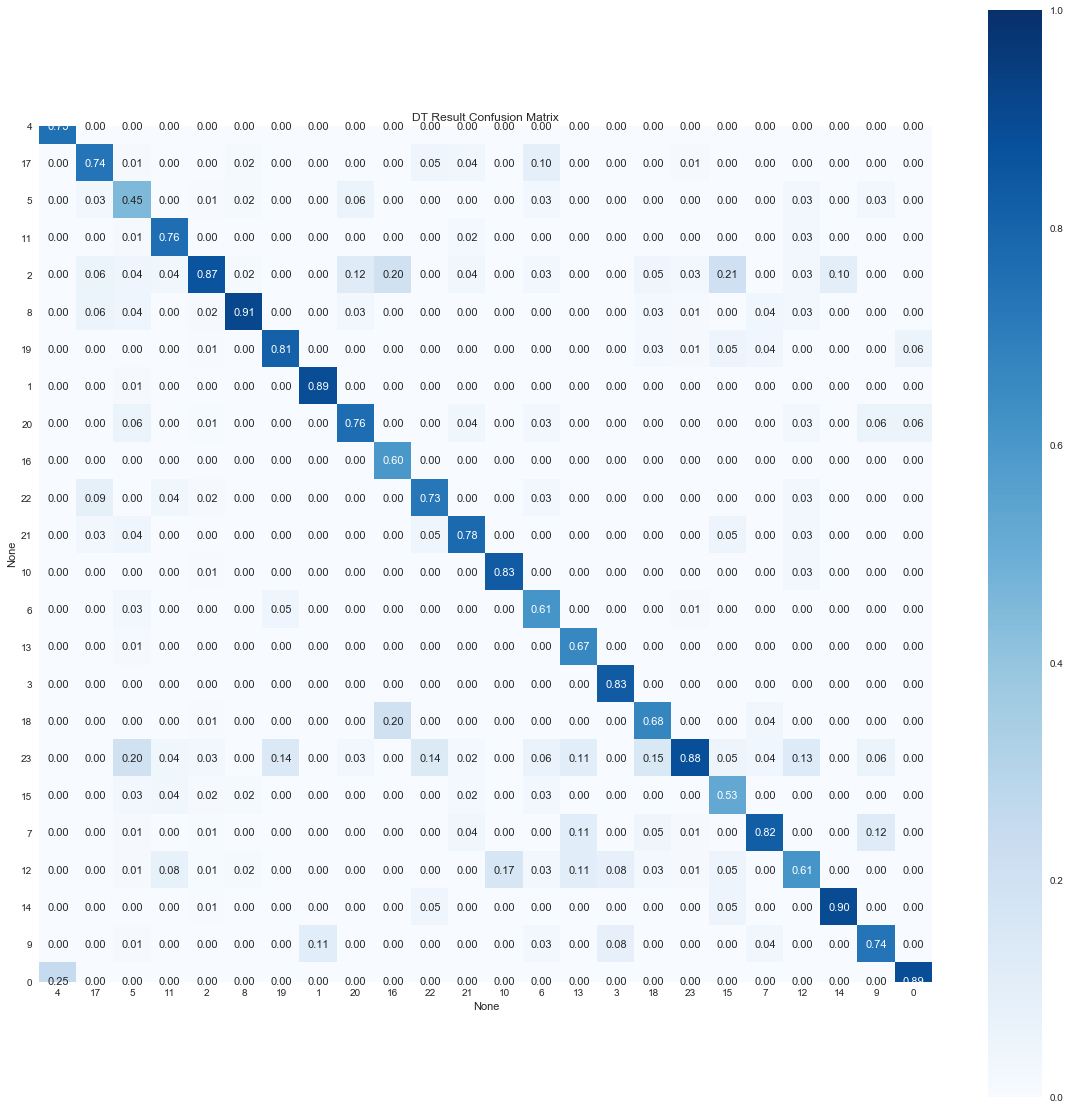

In [155]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#https://stackoverflow.com/questions/54589669/confusion-matrix-error-classification-metrics-cant-handle-a-mix-of-multilabel
import numpy as np
rounded_labels=np.argmax(y_test, axis=1)
rounded_labels[1]


cm_DecisionTree = confusion_matrix(rounded_labels, predicted) 
cm_DecisionTree


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

import seaborn as sns
import math

from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib as mpl

mpl.style.use('seaborn')

conf_arr = np.array(cm_DecisionTree)

sum = conf_arr.sum()

# conf_arr = conf_arr * 100.0 / ( 1.0 * sum )
labelss=list(test_df["target"].value_counts().index)

df_cm = pd.DataFrame(conf_arr, 
  index = [ labelss],
  columns = [labelss])

fig = plt.figure()
fig =plt.figure(figsize = (20,20))

plt.clf()

ax = fig.add_subplot(111)
ax.set_aspect(1)

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 1 # Add 0.5 to the bottom
t -= 1 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
# plt.show() # ta-da!

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

res = sn.heatmap(df_cm/np.sum(df_cm), annot=True, cmap='Blues',vmin=0.0, vmax=1, fmt='.02f', cbar = True,annot_kws={"fontsize":11})
res.set_yticklabels(res.get_yticklabels(), rotation = 0, fontsize = 10)
res.set_yticklabels(res.get_yticklabels(), rotation = 0, fontsize = 10)
# res.invert_yaxis()


# plt.yticks(, [ 'Dog', 'Cat', 'Rabbit'],va='center')

plt.title('DT Result Confusion Matrix')
plt.savefig("output_h_dttttt.png")
# plt.savefig('confusion_matrix.png', dpi=100, bbox_inches='tight' )

# plt.close()
# print('222')

## deep Learning <a class="anchor" id="seventh-bullet"></a>
-------------

After the pre-processing step has been completed, processed TF-IDF vectors have to be sent to the following deep learning code:

In [156]:
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
